# Chapter 1: Introduction to Recommendation Engines

## Basic imports

In [ ]:
# Imports
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import pairwise_kernels
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

from pathlib import Path
import os
import re
import html
import string

import unicodedata


import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer


from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences





[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


# Lesson 1: What are recommendation engines?

## Learning Objectives

- Learner will be able to be able to define what recommender systems are
- Learner will be able to be able to list the different approaches to recommender systems
- Learner will be able to identify different applications of recommender systems

## Excercise

List the approaches to build recommender systems

## Answer
- Simple recommender systems: Another third type is based on movie popularity independent of the user preferences. Too simple! But the basic idea of using movie prior popularity is a component in the system that we will develop as we will see.
- Meta data/ Content based: this is based on history of the user preferences. Not taking advantage of other users similarity.
- Collaborative filtering: takes advantages of similar users history, in addition to the same user past preferences, to recommend new items.



## Excercise

List three applications of recommendation engines

## Answer

- Product recommendation in online shopping
- Movie recommendation in entertainment apps
- Prediction of future disease based on patient-disease phenotypes

# Lesson 2: Simple Recommender system


## Learning Objectives

- Learner will be able to build simple recommender with sklearn based on movie popularity/votes based on IMDB dataset.
- Learner will be able to decide a metric for items to recommend based on that.
- Learner will be able to calculate a score for every item/movie.
- Learner will be able to sort items/movies based on their scores.


## Excercise

Build Simple Recommender System based on the metric below:
- weightedRating(WR) = ((v/v+m).R) + ((m/v+m).C)
 * v >> is the number of votes for the movie. (vote_count)
 * m >> is the min votes required to be listed in chart. (based on negative vote)
 * R >> is the average rating of the movie. (vote_average)
 * C >> is the mean vote across the the whole report. (calculate from data)


##  Preparation code
Not part of the excercise answer

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Download data from [kaggle](https://www.kaggle.com/rounakbanik/the-movies-dataset/download), or this [link](https://drive.google.com/drive/folders/1JnQXDCsGAb75I4PRRMDHUO0WxmXT-usv?usp=sharing)

In [ ]:
# Load Movies Metadata
imdb_data_dir = '/content/drive/My Drive/Colab Notebooks/Recommendation/DataCamp/imdb/'

In [ ]:

metadata = pd.read_csv(imdb_data_dir + 'movies_metadata.csv')

# Print the first three rows
metadata.head(3)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [ ]:
len(metadata)

45466

In [ ]:
# data columns
print(metadata.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# calculate C
C = metadata['vote_average'].mean()
print(C)

5.618207215133889


In [ ]:
# Calculate M
M = metadata['vote_count'].quantile(0.90)
print(M)
print(metadata.shape)

160.0
(45466, 24)


In [ ]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= M]
q_movies.shape

(4555, 24)

In [ ]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, M=M, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)


In [ ]:
print(q_movies.columns)

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')


In [ ]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [ ]:
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


## Answer

Build score function

In [ ]:
# Function that computes the weighted rating of each movie
C = metadata['vote_average'].mean()
M = metadata['vote_count'].quantile(0.90)

def weighted_rating(x, M=M, C=C):
    v = x['vote_count']
    R = x['vote_average']
    # Calculation based on the IMDB formula
    return (v/(v+M) * R) + (M/(M+v) * C)



## Excercise

Use the recommendation score to recommend the top 15 movies

## Answer

In [ ]:
# Filter out all qualified movies into a new DataFrame
q_movies = metadata.copy().loc[metadata['vote_count'] >= M]
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)
#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['title', 'vote_count', 'vote_average', 'score']].head(15)

,title,vote_count,vote_average,score
314,The Shawshank Redemption,8358.0,8.5,8.445869
834,The Godfather,6024.0,8.5,8.425439
10309,Dilwale Dulhania Le Jayenge,661.0,9.1,8.421453
12481,The Dark Knight,12269.0,8.3,8.265477
2843,Fight Club,9678.0,8.3,8.256385
292,Pulp Fiction,8670.0,8.3,8.251406
522,Schindler's List,4436.0,8.3,8.206639
23673,Whiplash,4376.0,8.3,8.205404
5481,Spirited Away,3968.0,8.3,8.196055
2211,Life Is Beautiful,3643.0,8.3,8.187171


# Lesson 3: Content based recommender systems

## Learning Objectives

- Learner will be able to understand and calculate the TF-IDF using sklearn for text sentence (item/movie overview).
- Learner will be able to understand what is meant by Dot product, and relation to Cosine similarity.
- Learner will be able to calculate cosine similarity with sklearn for two TF-IDF vectors.
- Learner will be able to recommend movies based on their cosine similarity to other movies overview text description.
- Learner will be able to use CountVectorizer in sklearn to recommend movies based on other meta-data, like credits, genres and keywords.

## Preparation code (not part of excercise)

In [ ]:
#Print plot overviews of the first 5 movies.
metadata['overview'].head()

0    Led by Woody, Andy's toys live happily in his ...
1    When siblings Judy and Peter discover an encha...
2    A family wedding reignites the ancient feud be...
3    Cheated on, mistreated and stepped on, the wom...
4    Just when George Banks has recovered from his ...
Name: overview, dtype: object

## Excercise
Calculate the TF-IDF transform for the movies overview texts

## Answer

In [ ]:


#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
metadata['overview'] = metadata['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(metadata['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(45466, 75827)

## Excercise

Compute the pair-wise cosine similarity between all overviews of movies. 


Remember: since that:

$$x.y = ||x||.||y||.cos(\theta)$$

So 
$$cos(\theta) = \frac{x.y}{||x||||y||}$$

So we can use the `linear_kernel` from sklearn, which is faster than `cosine_similarity`

## Answer

In [ ]:
# Compute the cosine Similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

## Excercise

Implement the function `get_recommendations` that produces 10 most similar movies, based on cosine_similarity between the TF-IDF scores of descriptions

## Answer

In [ ]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(metadata.index, index=metadata['title']).drop_duplicates()

In [ ]:

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
print(get_recommendations('The Dark Knight Rises'))

12481                                      The Dark Knight
150                                         Batman Forever
1328                                        Batman Returns
15511                           Batman: Under the Red Hood
585                                                 Batman
21194    Batman Unmasked: The Psychology of the Dark Kn...
9230                    Batman Beyond: Return of the Joker
18035                                     Batman: Year One
19792              Batman: The Dark Knight Returns, Part 1
3095                          Batman: Mask of the Phantasm
Name: title, dtype: object


In [ ]:
get_recommendations('The Godfather')

1178               The Godfather: Part II
44030    The Godfather Trilogy: 1972-1990
1914              The Godfather: Part III
23126                          Blood Ties
11297                    Household Saints
34717                   Start Liquidation
10821                            Election
38030            A Mother Should Be Loved
17729                   Short Sharp Shock
26293                  Beck 28 - Familjen
Name: title, dtype: object

## Excercise

In this excercise, we want to recommend movies based on some extra metadata _features_, like `'cast', 'crew', 'keywords', 'genres'`. One important difference is that you use the `CountVectorizer()` instead of TF-IDF. This is because you do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

You are asked to recommend movies on the new cosine_similarity, pair wise `CountVectorizer()` scores.

##  Preparation code
Not part of the excercise answer

In [ ]:
# Load keywords and credits
credits = pd.read_csv(imdb_data_dir + 'credits.csv')
keywords = pd.read_csv(imdb_data_dir + 'keywords.csv')

# Remove rows with bad IDs.
metadata = metadata.drop([19730, 29503, 35587])

# Convert IDs to int. Required for merging
keywords['id'] = keywords['id'].astype('int')
credits['id'] = credits['id'].astype('int')
metadata['id'] = metadata['id'].astype('int')

# Merge keywords and credits into your main metadata dataframe
metadata = metadata.merge(credits, on='id')
metadata = metadata.merge(keywords, on='id')

In [ ]:
# Print the first two movies of your newly merged metadata
metadata.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,keywords
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...","[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...","[{'id': 10090, 'name': 'board game'}, {'id': 1..."


In [ ]:
len(metadata)

46628

In [ ]:
# Limit the data for memory size
metadata = metadata[:10000]

In [ ]:
# Parse the stringified features into their corresponding python objects
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(literal_eval)

In [ ]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [ ]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [ ]:
# Define new director, cast, genres and keywords features that are in a suitable form.
metadata['director'] = metadata['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    metadata[feature] = metadata[feature].apply(get_list)

In [ ]:
# Print the new features of the first 3 films
metadata[['title', 'cast', 'director', 'keywords', 'genres']].head(10)

,title,cast,director,keywords,genres
0,Toy Story,"[tomhanks, timallen, donrickles]",johnlasseter,"[jealousy, toy, boy]","[animation, comedy, family]"
1,Jumanji,"[robinwilliams, jonathanhyde, kirstendunst]",joejohnston,"[boardgame, disappearance, basedonchildren'sbook]","[adventure, fantasy, family]"
2,Grumpier Old Men,"[waltermatthau, jacklemmon, ann-margret]",howarddeutch,"[fishing, bestfriend, duringcreditsstinger]","[romance, comedy]"
3,Waiting to Exhale,"[whitneyhouston, angelabassett, lorettadevine]",forestwhitaker,"[basedonnovel, interracialrelationship, single...","[comedy, drama, romance]"
4,Father of the Bride Part II,"[stevemartin, dianekeaton, martinshort]",charlesshyer,"[baby, midlifecrisis, confidence]",[comedy]
5,Heat,"[alpacino, robertdeniro, valkilmer]",michaelmann,"[robbery, detective, bank]","[action, crime, drama]"
6,Sabrina,"[harrisonford, juliaormond, gregkinnear]",sydneypollack,"[paris, brotherbrotherrelationship, chauffeur]","[comedy, romance]"
7,Tom and Huck,"[jonathantaylorthomas, bradrenfro, rachaelleig...",peterhewitt,[],"[action, adventure, drama]"
8,Sudden Death,"[jean-claudevandamme, powersboothe, dorianhare...",peterhyams,"[terrorist, hostage, explosive]","[action, adventure, thriller]"
9,GoldenEye,"[piercebrosnan, seanbean, izabellascorupco]",martincampbell,"[cuba, falselyaccused, secretidentity]","[adventure, action, thriller]"


In [ ]:
# Function to convert all strings to lower case and strip names of spaces
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:
# Apply clean_data function to your features.
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    metadata[feature] = metadata[feature].apply(clean_data)

In [ ]:
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])

In [ ]:
# Create a new soup feature
metadata['soup'] = metadata.apply(create_soup, axis=1)

## Answer

In [ ]:


count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(metadata['soup'])
cosine_sim2 = cosine_similarity(count_matrix, count_matrix)
# Reset index of your main DataFrame and construct reverse mapping as before
metadata = metadata.reset_index()
indices = pd.Series(metadata.index, index=metadata['title'])

## Excercise
Implement the function `get_recommendations` that produces 10 most similar movies, using the Counts based pair-wise cosine similarity to give recommendations based on meta data.

## Answer

In [ ]:

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim2):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return metadata['title'].iloc[movie_indices]

In [ ]:
get_recommendations('The Godfather', cosine_sim2)

1934           The Godfather: Part III
1199            The Godfather: Part II
8001    The Night of the Following Day
7772                          Mitchell
1186                    Apocalypse Now
1648                  Ill Gotten Gains
3487        Jails, Hospitals & Hip-Hop
4012                  Gardens of Stone
5309                       The Gambler
5                                 Heat
Name: title, dtype: object

# Chapter 2: How to deal with tabular data using deep learning?

## Lesson 1: Introduction to NLP with Keras

## Learning Objectives
- Learner will be able to write keras program following the 4-ingredients of ML.
- Learner will be able to classify the sentiment of movie reviews based on binary BoW model, using readily processed IMDB dataset.
- Learner will be able to use nltk and keras tools to apply text pre-processing and cleaning on raw IMDB dataset from scratch.
- Learner will be able to extract different text features and apply them to the IMDB dataset, like counts, frequency and TF-IDF.

# Preparation code
Not part of the excercise answer

Build BoW model in keras based on 4-ingredients:
- Data
- Model
- Loss
- Optimizer

You will use readily processed keras imdb dataset.

The data will be loaded for you.

In [ ]:

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Excercise 

Implement `vectorize_sequences` that transfroms the variable length sequence of word indices into equal length, one-hot-encoded vectors, of length same as the vocabulary size.

## Answer

In [ ]:


def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

## Excercise

Use sklearn `train_test_split` to create the validation data, with ratio = 10%

## Answer

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

## Excercise

Build keras `Sequential` model with the following architecture:
- Dense layer of 16 outputs
- Dense layer of 16 outputs
- Final decision layer

Print the model summary, and plot the model graph

## Answer

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


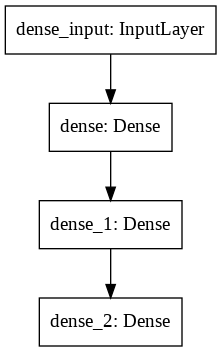

In [ ]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
plot_model(model)

## Excercise

Complete the last two ingredients:
- Loss
- Optimizer = rmsprop, with lr=0.001

And fit the model.


In [ ]:
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
44/44 [==============================] - 1s 24ms/step - loss: 0.4509 - binary_accuracy: 0.8195 - val_loss: 0.3268 - val_binary_accuracy: 0.8920
Epoch 2/20
44/44 [==============================] - 1s 20ms/step - loss: 0.2593 - binary_accuracy: 0.9095 - val_loss: 0.2819 - val_binary_accuracy: 0.8860
Epoch 3/20
44/44 [==============================] - 1s 17ms/step - loss: 0.1962 - binary_accuracy: 0.9302 - val_loss: 0.2714 - val_binary_accuracy: 0.8884
Epoch 4/20
44/44 [==============================] - 1s 17ms/step - loss: 0.1596 - binary_accuracy: 0.9449 - val_loss: 0.2827 - val_binary_accuracy: 0.8840
Epoch 5/20
44/44 [==============================] - 1s 17ms/step - loss: 0.1333 - binary_accuracy: 0.9545 - val_loss: 0.3165 - val_binary_accuracy: 0.8832
Epoch 6/20
44/44 [==============================] - 1s 17ms/step - loss: 0.1135 - binary_accuracy: 0.9627 - val_loss: 0.3525 - val_binary_accuracy: 0.8688
Epoch 7/20
44/44 [==============================] - 1s 16ms/step - los

## Excercise

Plot the learning curves for train/val accuracy and loss

## Answer

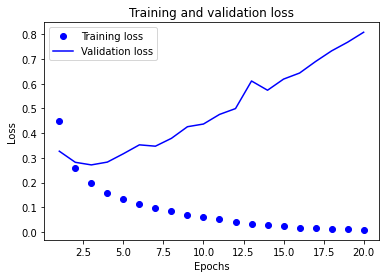

In [ ]:

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


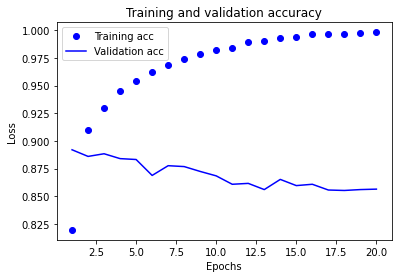

In [ ]:

plt.clf()   # clear figure
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Preparation code
Not part of the excercise answer

In this part we will raw IMDB text, and apply the data preprocessing pipeline and preparation.

Following we will apply the BoW model as before, using three modes:
- Binary
- TF-IDF
- Counts
- Frequency


In [ ]:
DATA_PATH=Path('.')
DATA_PATH.mkdir(exist_ok=True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz 
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  8244k      0  0:00:09  0:00:09 --:--:-- 17.7M


In [ ]:
import numpy as np
CLASSES = ['neg', 'pos']#, 'unsup']
PATH=Path('./aclImdb/')

def get_texts(path):
    texts,labels = [],[]
    for idx,label in enumerate(CLASSES):
        for fname in (path/label).glob('*.*'):
            #texts.append(fixup(fname.open('r', encoding='utf-8').read()))
            texts.append(fname.open('r', encoding='utf-8').read())
            labels.append(idx)
    #return np.array(texts),np.array(labels)
    return texts, labels

trn_texts,trn_labels = get_texts(PATH/'train')
tst_texts,tst_labels = get_texts(PATH/'test')

In [ ]:
for t in trn_texts[:10]:
  print(t)

I remember reading all the horrible, horrible reviews for this film when it came out. I meant to go see how horrible it was but it was out of theaters in three weeks. The only other movie to manage that is Gigli. <br /><br />When the movie came out on DVD, I bought it to see how awful it was. I couldn't think of the sheer horrible attention that this film was getting was possible. After seeing it, I can understand. <br /><br />First off, let me say that this film is not without some cool shots. There's a nice shot at the beginning that shows a bullet being fired from inside the gun, which I thought was neat. And the way the monsters in this movie die is sort of cool to look at; but it gets old after the first time you see it. <br /><br />Let me start with the worst thing in this movie: Tara Reid. If bad acting was a sin, then Hell would've chucked Tara Reid right out since she's so unbelievably awful in this movie it's unthinkable. And of all the roles, she plays a curator. Now if she 

In [ ]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    stop_words = stopwords.words('english')
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem or lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [ ]:
def normalize_corpus(corpus):
  return [normalize_text(t) for t in corpus]

In [ ]:
trn_texts = normalize_corpus(trn_texts)
tst_texts = normalize_corpus(tst_texts)

## Excercise

We will use keras `Tokenizer` class to extract the binary features as done with the keras imdb dataset using the `vectorize_sequence` function. In addition the binary BoW OHE vector will be obtained with the `Tokenizer.texts_to_matrix`.

Use 10000 words of highest frquency for vocab size.

## Answer

In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='binary')
x_test = tok.texts_to_matrix(tst_texts, mode='binary')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

## The below part is not part of the answer
Same model and plotting code can be used as before

In [ ]:




x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.5159 - binary_accuracy: 0.8089 - val_loss: 0.4067 - val_binary_accuracy: 0.8672
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3189 - binary_accuracy: 0.9021 - val_loss: 0.3275 - val_binary_accuracy: 0.8793
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2356 - binary_accuracy: 0.9256 - val_loss: 0.3253 - val_binary_accuracy: 0.8683
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1851 - binary_accuracy: 0.9410 - val_loss: 0.3002 - val_binary_accuracy: 0.8815
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1506 - binary_accuracy: 0.9529 - val_loss: 0.3085 - val_binary_accuracy: 0.8805
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1255 - binary_accuracy: 0.9614 - val_loss: 0.3276 - val_binary_accuracy: 0.8787
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - los

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

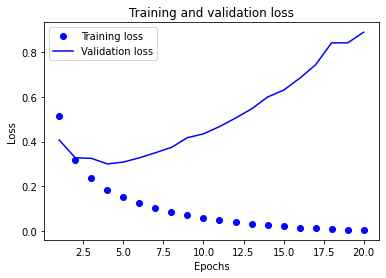

In [ ]:

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

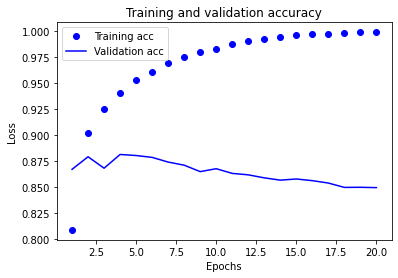

In [ ]:

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Excercise

Repeat for Count features

## Answer

In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='count')
x_test = tok.texts_to_matrix(tst_texts, mode='count')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

## The below part is not part of the answer
Same model and plotting code can be used as before

Epoch 1/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5316 - binary_accuracy: 0.7857 - val_loss: 0.4165 - val_binary_accuracy: 0.8671
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3279 - binary_accuracy: 0.9020 - val_loss: 0.3334 - val_binary_accuracy: 0.8769
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2368 - binary_accuracy: 0.9247 - val_loss: 0.3091 - val_binary_accuracy: 0.8810
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1858 - binary_accuracy: 0.9409 - val_loss: 0.3159 - val_binary_accuracy: 0.8787
Epoch 5/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1533 - binary_accuracy: 0.9525 - val_loss: 0.3233 - val_binary_accuracy: 0.8807
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1255 - binary_accuracy: 0.9625 - val_loss: 0.3391 - val_binary_accuracy: 0.8780
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

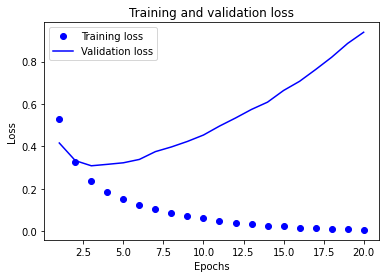

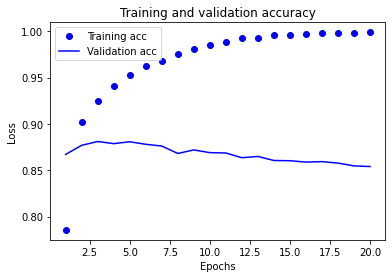

In [ ]:




x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Excercise

Repeat for freq features

## Answer

In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='freq')
x_test = tok.texts_to_matrix(tst_texts, mode='freq')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

## The below part is not part of the answer
Same model and plotting code can be used as before

Epoch 1/20
30/30 [==============================] - 1s 27ms/step - loss: 0.6893 - binary_accuracy: 0.5926 - val_loss: 0.6846 - val_binary_accuracy: 0.7849
Epoch 2/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6758 - binary_accuracy: 0.7874 - val_loss: 0.6676 - val_binary_accuracy: 0.8203
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6540 - binary_accuracy: 0.8299 - val_loss: 0.6448 - val_binary_accuracy: 0.8195
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.6255 - binary_accuracy: 0.8470 - val_loss: 0.6160 - val_binary_accuracy: 0.8267
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5913 - binary_accuracy: 0.8561 - val_loss: 0.5835 - val_binary_accuracy: 0.8296
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5530 - binary_accuracy: 0.8614 - val_loss: 0.5473 - val_binary_accuracy: 0.8389
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - los

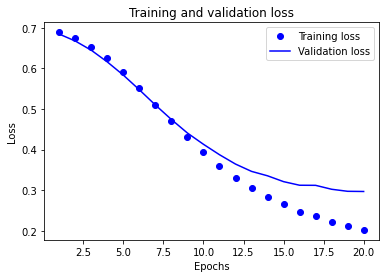

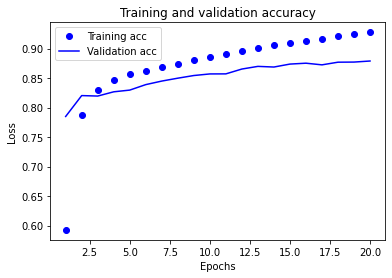

In [ ]:




x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Excercise

Repeat for TF-IDF features

## Answer

In [ ]:
vocab_sz = 10000
tok = Tokenizer(num_words=vocab_sz, oov_token='UNK')
tok.fit_on_texts(trn_texts + tst_texts)
#vocab_sz = len(tok.word_index)

# Extract binary BoW features
x_train = tok.texts_to_matrix(trn_texts, mode='tfidf')
x_test = tok.texts_to_matrix(tst_texts, mode='tfidf')
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

## The below part is not part of the answer
Same model and plotting code can be used as before

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4701 - binary_accuracy: 0.7903 - val_loss: 0.3477 - val_binary_accuracy: 0.8650
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2194 - binary_accuracy: 0.9255 - val_loss: 0.3169 - val_binary_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1334 - binary_accuracy: 0.9596 - val_loss: 0.3382 - val_binary_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0907 - binary_accuracy: 0.9747 - val_loss: 0.3840 - val_binary_accuracy: 0.8730
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0560 - binary_accuracy: 0.9863 - val_loss: 0.4321 - val_binary_accuracy: 0.8676
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.0406 - binary_accuracy: 0.9903 - val_loss: 0.4997 - val_binary_accuracy: 0.8660
Epoch 7/20
30/30 [==============================] - 1s 26ms/step - los

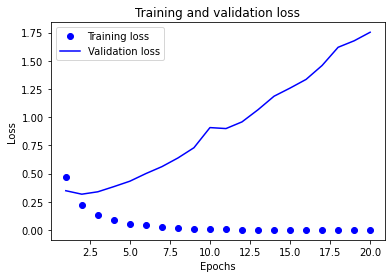

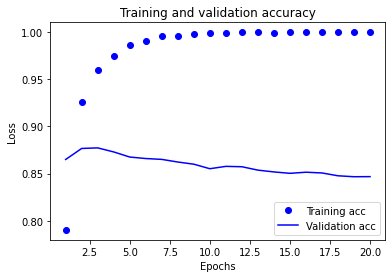

In [ ]:




x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])
			  
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
history_dict = history.history
history_dict.keys()


acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Lesson 2: Introduction to functional models

## Learning Objectives
- Learner will be able to build a multi-input, multi-output models with Keras
- Learner will be able to build a sentiment classification model for imdb dataset using Functional models

## Excercise

Use keras `Model` API to build the following graph:


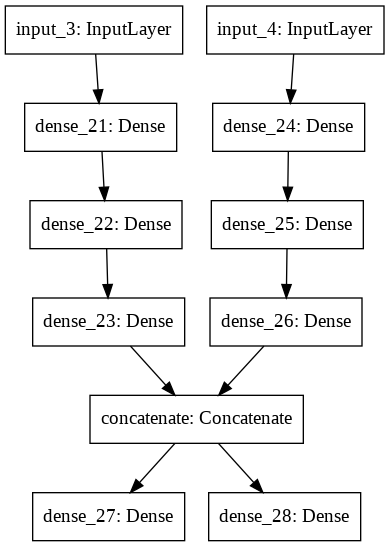

In [ ]:
plot_model(model)


## Answer

In [ ]:
inp_1 = layers.Input(shape=100)
inp_2 = layers.Input(shape=100)

# Branch 1
x = layers.Dense(50)(inp_1)
x = layers.Dense(50)(x)
out_1 = layers.Dense(25)(x)

# Branch 2
x = layers.Dense(50)(inp_2)
x = layers.Dense(50)(x)
out_2 = layers.Dense(25)(x)

merged = layers.concatenate([out_1, out_2])

out_1 = layers.Dense(100)(merged)
out_2 = layers.Dense(100)(merged)

# func
model = models.Model(inputs=[inp_1, inp_2], outputs=[out_1, out_2])

model.summary()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 100)]        0                                            
__________________________________________________________________________________________________
dense_21 (Dense)                (None, 50)           5050        input_3[0][0]                    
__________________________________________________________________________________________________
dense_24 (Dense)                (None, 50)           5050        input_4[0][0]                    
____________________________________________________________________________________________

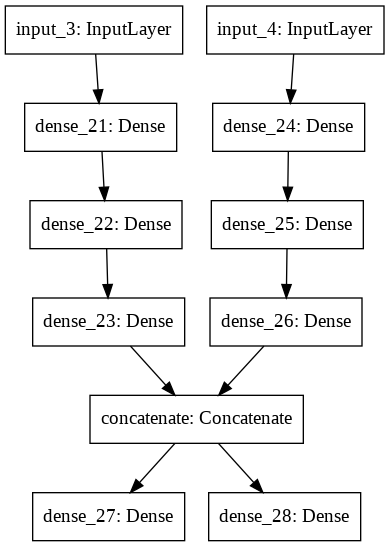

In [ ]:
plot_model(model)

## Excercise

Use the functional `Model` to build the following model for keras IMDB sentiment classification

## Preparation code

Not part of the answer

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

## Answer

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
dense_32 (Dense)             (None, 16)                160016    
_________________________________________________________________
dense_33 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_34 (Dense)             (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________
None


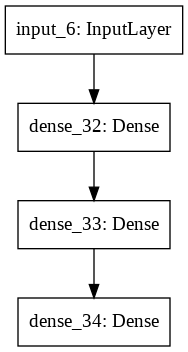

In [ ]:

inp = layers.Input(shape=(10000,))
x = layers.Dense(16, activation='relu')(inp)
x = layers.Dense(16, activation='relu')(x)
out = layers.Dense(1, activation='sigmoid')(x)
model = models.Model(inp, out)
print(model.summary())
plot_model(model)

## The following part is not part of the answer

Epoch 1/20
44/44 [==============================] - 1s 22ms/step - loss: 0.4549 - binary_accuracy: 0.8184 - val_loss: 0.3448 - val_binary_accuracy: 0.8696
Epoch 2/20
44/44 [==============================] - 1s 21ms/step - loss: 0.2622 - binary_accuracy: 0.9083 - val_loss: 0.3084 - val_binary_accuracy: 0.8708
Epoch 3/20
44/44 [==============================] - 1s 21ms/step - loss: 0.2010 - binary_accuracy: 0.9286 - val_loss: 0.2696 - val_binary_accuracy: 0.8892
Epoch 4/20
44/44 [==============================] - 1s 20ms/step - loss: 0.1674 - binary_accuracy: 0.9408 - val_loss: 0.2775 - val_binary_accuracy: 0.8868
Epoch 5/20
44/44 [==============================] - 1s 17ms/step - loss: 0.1432 - binary_accuracy: 0.9498 - val_loss: 0.3036 - val_binary_accuracy: 0.8760
Epoch 6/20
44/44 [==============================] - 1s 17ms/step - loss: 0.1224 - binary_accuracy: 0.9581 - val_loss: 0.3184 - val_binary_accuracy: 0.8844
Epoch 7/20
44/44 [==============================] - 1s 20ms/step - los

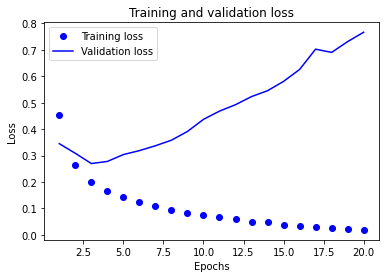

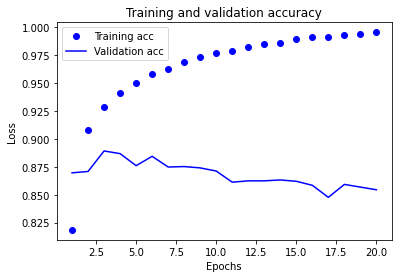

In [ ]:

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))



acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()



plt.clf()   # clear figure
acc_values = history.history['binary_accuracy']
val_acc_values = history.history['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Lesson 3: Introduction to Embeddings and how to use with Categorical variables

## Learning Objectives
- Learner will be able to build models using Embedding layers for categorical variables inputs.
- Learner will be able to use Embedding layers with categorical word indices for text classification tasks.

## Excercise

For the sample text data below, use Embedding layer to encode the latent representation of words indices

## Preparation code
Not part of the answer

In [ ]:
# define documents
docs = ['Well done!',
'Good work','Great effort',
'nice work',
'Excellent!',
'Weak',
'Poor effort!',
'not good',
'poor work',
'Could have done better.']
# define class labels
labels = [1,1,1,1,1,0,0,0,0,0]
# integer encode the documents
#vocab_size = 50

#encoded_docs = [one_hot(d, vocab_size) for d in docs]
t = Tokenizer()
t.fit_on_texts(docs)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(docs)
print(encoded_docs)

print(encoded_docs)
# pad documents to a max length of 4 words
max_length = 4
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[6, 2], [3, 1], [7, 4], [8, 1], [9], [10], [5, 4], [11, 3], [5, 1], [12, 13, 2, 14]]
[[ 6  2  0  0]
 [ 3  1  0  0]
 [ 7  4  0  0]
 [ 8  1  0  0]
 [ 9  0  0  0]
 [10  0  0  0]
 [ 5  4  0  0]
 [11  3  0  0]
 [ 5  1  0  0]
 [12 13  2 14]]


## Answer


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 4, 8)              120       
_________________________________________________________________
flatten (Flatten)            (None, 32)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 33        
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
None


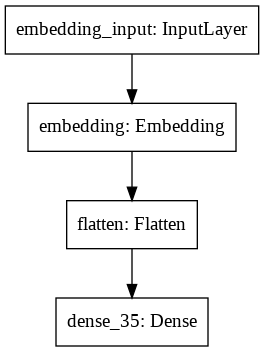

In [ ]:
# define the model
model = models.Sequential()
model.add(layers.Embedding(vocab_size, 8, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))
print(model.summary())
plot_model(model)

## The following part is not part of the answer

In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# fit the model
model.fit(np.array(padded_docs), np.array(labels), epochs=50, verbose=0)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose=0)
print('Accuracy: %f' % (accuracy*100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Accuracy: 89.999998


## Excercise
Apply the same model to IMDB dataset

## Preparation
Not part of the answer

In [ ]:
vocab_size = 10000
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocab_size)

train_labels = np.asarray(train_labels).astype('float32')
test_labels = np.asarray(test_labels).astype('float32')

x_train, x_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.1, random_state=42)



max_length = 100
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_val = pad_sequences(x_val, maxlen=max_length, padding='post')


## Answer

In [ ]:

# define the model
emb_sz = 50
model = models.Sequential()
model.add(layers.Embedding(vocab_size+1, emb_sz, input_length=max_length))
model.add(layers.Flatten())
model.add(layers.Dense(25))
model.add(layers.Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
# summarize the model
model.summary()
# fit the model
model.fit(np.array(x_train), np.array(y_train), validation_data=(np.array(x_val), np.array(y_val)), epochs=10, verbose=1)


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 50)           500050    
_________________________________________________________________
flatten_6 (Flatten)          (None, 5000)              0         
_________________________________________________________________
dense_42 (Dense)             (None, 25)                125025    
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 26        
Total params: 625,101
Trainable params: 625,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
704/704 [==============================] - 5s 7ms/step - loss: 0.4308 - acc: 0.7872 - val_loss: 0.3487 - val_acc: 0.8420
Epoch 2/10
704/704 [==============================] - 4s 6ms/step - loss: 0.1080 - acc: 0.9647 - val_loss: 0.5289

# Chapter 3: Collaborative filtering


## Lesson 1: What are collaborative filters?

## Learning Objectives
- Learner will be able to identify the difference between the collaborative filtering approach and content based approach.
- Learner will be able to capture the overall model architecture using the ML workflow.
- Learner will be able to describe the learning process and the involved loss optimization using neural networks to build a colaborative filter.

## Excercise

Describe collaborative filtering and its relation to SVD and Matrix factorization

# Lesson 2: The use of dot products to measure similarity
- Learner will be able to apply dot products to measure vectors similarity
- Learner will be able to use sklearn to measure different similarity metrics, like cosine similarity
- Learner will be able to build models with Keras involving Dot product

## Excercise

Find the simialrity score between the following group of vectors using dot product in sklearn

In [ ]:
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1]])

## Answer

In [ ]:
pairwise_kernels(X, Y, metric='linear')

array([[ 2.,  7.],
       [ 3., 11.],
       [ 5., 18.]])

## Excercise

Find the simialrity score between the following group of vectors using cosine similarity in sklearn

In [ ]:
X = np.array([[2, 3], [3, 5], [5, 8]])
Y = np.array([[1, 0], [2, 1]])

## Answer

In [ ]:
cosine_similarity(X, Y)

array([[0.5547002 , 0.86824314],
       [0.51449576, 0.84366149],
       [0.52999894, 0.85328183]])

## Excercise
Build keras `Model` that applies Dot operation on two inputs of size (10000,)

## Answer

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 10000)]      0                                            
__________________________________________________________________________________________________
dot (Dot)                       (None, 1)            0           input_7[0][0]                    
                                                                 input_8[0][0]                    
Total params: 0
Trainable params: 0
Non-trainable params: 0
__________________________________________________________________________________________________


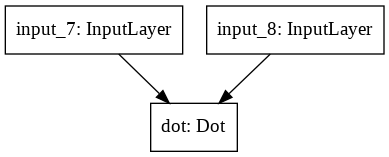

In [ ]:
inp_1 = layers.Input(shape=(10000,))
inp_2 = layers.Input(shape=(10000,))
out = layers.Dot(axes=1)([inp_1, inp_2])
model = models.Model(inputs=[inp_1, inp_2], outputs=out)
model.summary()
plot_model(model)

# Lesson 3: The use of categorical Embeddings to encode Latent factors and Meta data

## Learning Objectives
- Learner will be able to use categorical variables as inputs to keras models
- Learner will be able to encode different meta data from MovieLens dataset as inputs to Keras model

## Excercise

Use the Embedding layer to build the following model
- inp_1 = categorical/scalar value, range = 1000 values
- inp_2 = categorical/scalar value, range = 2000 values
- out = 100 dimensions

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_12 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_9 (Embedding)         (None, 1, 100)       100000      input_11[0][0]                   
__________________________________________________________________________________________________
embedding_10 (Embedding)        (None, 1, 100)       200000      input_12[0][0]                   
____________________________________________________________________________________________

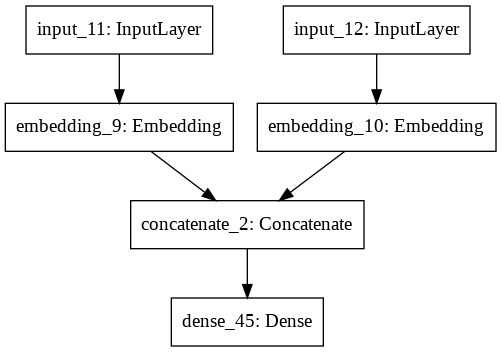

In [ ]:
# Number of latent factors
emb_sz = 100

# User embeddings
inp_1 = layers.Input(shape=(1,))
emb_1 = layers.Embedding(1000, emb_sz)(inp_1)

# Movie embeddings
inp_2 = layers.Input(shape=(1,))
emb_2 = layers.Embedding(2000, emb_sz)(inp_2)

emb = layers.concatenate([emb_1, emb_2])
out = layers.Dense(100)(emb)

model = models.Model(inputs=[inp_1, inp_2], outputs=out)
print(model.summary())
plot_model(model)

# Lesson 4: Putting it all togehter! 

## Learning Objectives
- Learner will be able to extract the user/movie rating matrix from MovieLens dataset using pandas
- Learner will be able to prepare the categorical variables of meta data for MovieLens dataset
- Learner will be able to build a collaborative filter for MovieLens dataset


## Excercise

Extract the user/movie rating matrix from MovieLens dataset using pandas, for the top 15 movies and users.

## Preparation
Not part of the answer

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

--2020-05-10 14:05:47--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K   972KB/s    in 1.0s    

2020-05-10 14:05:48 (972 KB/s) - ‘ml-latest-small.zip’ saved [978202/978202]



In [ ]:
!unzip ml-latest-small.zip

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
pd.crosstab(ratings.userId, ratings.movieId).head()

movieId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,34,36,38,39,40,41,42,43,...,185135,185435,185473,185585,186587,187031,187541,187593,187595,187717,188189,188301,188675,188751,188797,188833,189043,189111,189333,189381,189547,189713,190183,190207,190209,190213,190215,190219,190221,191005,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Answer

In [ ]:
k = 15
g = ratings.groupby('userId')['rating'].count()
top_users = g.sort_values(ascending=False)[:k]

g = ratings.groupby('movieId')['rating'].count()
top_movies = g.sort_values(ascending=False)[:k]

top_r = ratings.join(top_users, rsuffix='_r', how='inner', on='userId')
top_r = top_r.join(top_movies, rsuffix='_r', how='inner', on='movieId')

pd.crosstab(top_r.userId, top_r.movieId, top_r.rating, aggfunc=np.sum)

movieId,1,50,110,260,296,318,356,480,527,589,593,1196,2571,2858,2959
userId,,,,,,,,,,,,,,,
68,2.5,3.0,2.5,5.0,2.0,3.0,3.5,3.5,4.0,3.5,3.5,5.0,4.5,5.0,2.5
182,4.0,4.5,3.5,3.5,5.0,4.5,5.0,3.5,4.0,2.0,4.5,3.0,5.0,5.0,5.0
249,4.0,4.0,5.0,5.0,4.0,4.5,4.5,4.0,4.5,4.0,4.0,5.0,5.0,4.5,5.0
274,4.0,4.0,4.5,3.0,5.0,4.5,4.5,3.5,4.0,4.5,4.0,4.5,4.0,5.0,5.0
288,4.5,NaN,5.0,5.0,5.0,5.0,5.0,2.0,5.0,4.0,5.0,4.5,3.0,NaN,3.5
307,4.0,4.5,3.5,3.5,4.5,4.5,4.0,3.5,4.5,2.5,4.5,3.0,3.5,4.0,4.0
380,5.0,4.0,4.0,5.0,5.0,3.0,5.0,5.0,NaN,5.0,5.0,5.0,4.5,NaN,4.0
387,NaN,4.5,3.5,4.5,5.0,3.5,4.0,3.0,NaN,3.5,4.0,4.5,4.0,4.5,4.5
414,4.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0


## Excercise

Encode the user id, and movie id categorical variables, using sklean LabelEncoder to be used with the Embedding layer.

## Answer

In [ ]:
user_enc = LabelEncoder()
ratings['user'] = user_enc.fit_transform(ratings.userId.values)
n_users = ratings['user'].nunique()

item_enc = LabelEncoder()
ratings['movie'] = user_enc.fit_transform(ratings.movieId.values)
n_movies = ratings['movie'].nunique()

ratings['rating'] = ratings['rating'].values.astype(np.float32)
min_rating = min(ratings['rating'])
max_rating = max(ratings['rating'])

n_users, n_movies, min_rating, max_rating

(610, 9724, 0.5, 5.0)

## Excercise

Build the collaborative filtering model, using keras Embedding and Dot layers

## Answer

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding_LUT (Embedding)  (None, 1, 50)        30500       user_id[0][0]                    
__________________________________________________________________________________________________
movie_embedding_LUT (Embedding) (None, 1, 50)        486200      movie_id[0][0]                   
____________________________________________________________________________________________

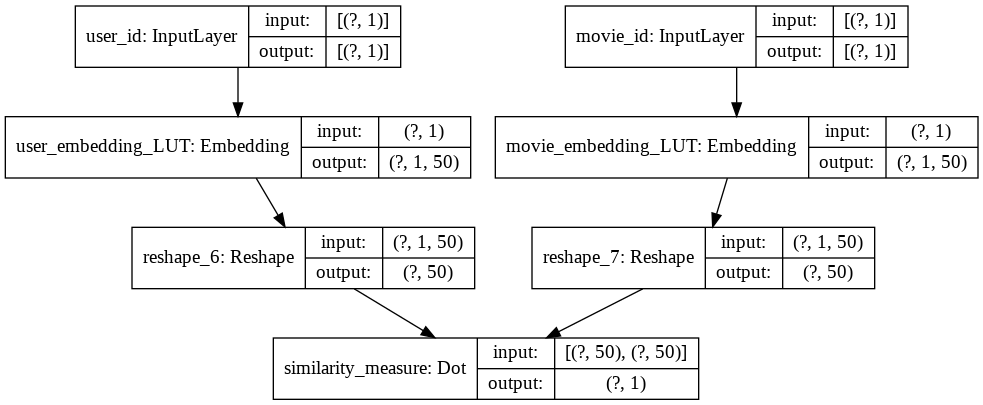

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,), name='user_id')
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6), name='user_embedding_LUT')(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# Movie embeddings
movie = layers.Input(shape=(1,), name='movie_id')
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6), name='movie_embedding_LUT')(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Dot product
rating = layers.Dot(axes=1, name='similarity_measure')([user_emb, movie_emb])


# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)

## Excercise
Extract the train and test data for MovieLens

In [ ]:
X = ratings[['user', 'movie']].values
y = ratings['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90752, 2) (90752,)
(10084, 2) (10084,)


## Excercise
Compile and train the model on MovieLens dataset

## Answer

In [ ]:
# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 4ms/step - loss: 9.3721 - root_mean_squared_error: 3.0611 - val_loss: 3.2083 - val_root_mean_squared_error: 1.7907
Epoch 2/5
1418/1418 [==============================] - 5s 3ms/step - loss: 1.9927 - root_mean_squared_error: 1.4088 - val_loss: 1.6493 - val_root_mean_squared_error: 1.2814
Epoch 3/5
1418/1418 [==============================] - 5s 3ms/step - loss: 1.1534 - root_mean_squared_error: 1.0687 - val_loss: 1.3665 - val_root_mean_squared_error: 1.1643
Epoch 4/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.8975 - root_mean_squared_error: 0.9403 - val_loss: 1.2743 - val_root_mean_squared_error: 1.1231
Epoch 5/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.7693 - root_mean_squared_error: 0.8686 - val_loss: 1.2384 - val_root_mean_squared_error: 1.1065


# Chapter 4: Improving the recommendation engine and analysis

## Lesson 1: Scaling the model output with sigmoid

## Learning Objectives:
- Learner will be able to beat the SoTA benchmarks of the best recommender engine on MovieLens.
- Learner will be able to improve the recommendation engine by scaling the output of the model according to the range of ratings.


## Excercise

To help the model to scale the output within the required range, we pass the output of the Dot product to a sigmoid, which ranges from [0,1], then we scale that up to the range of min_rating to max_rating.

## Answer

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_15 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_16 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 1, 50)        30500       input_15[0][0]                   
__________________________________________________________________________________________________
embedding_14 (Embedding)        (None, 1, 50)        486200      input_16[0][0]                   
____________________________________________________________________________________________

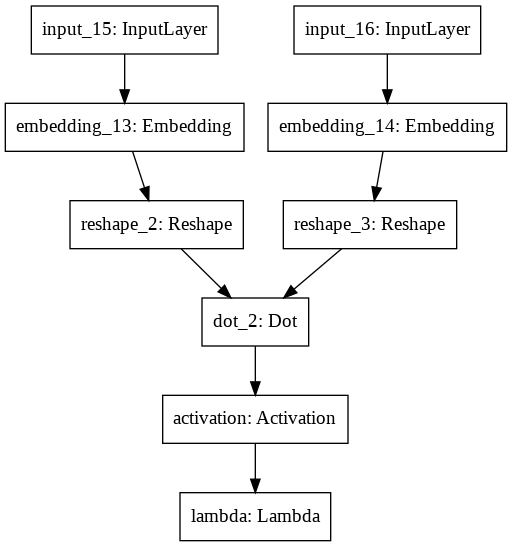

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Dot product
rating = layers.Dot(axes=1)([user_emb, movie_emb])
rating = layers.Activation('sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model)

Not part of the answer

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 3ms/step - loss: 1.4039 - root_mean_squared_error: 1.1846 - val_loss: 0.9433 - val_root_mean_squared_error: 0.9704
Epoch 2/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.7723 - root_mean_squared_error: 0.8773 - val_loss: 0.8003 - val_root_mean_squared_error: 0.8927
Epoch 3/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.5954 - root_mean_squared_error: 0.7689 - val_loss: 0.7749 - val_root_mean_squared_error: 0.8774
Epoch 4/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.4743 - root_mean_squared_error: 0.6845 - val_loss: 0.7739 - val_root_mean_squared_error: 0.8761
Epoch 5/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.3797 - root_mean_squared_error: 0.6105 - val_loss: 0.7837 - val_root_mean_squared_error: 0.8808


## Lesson 2: Adding user and movie biases

## Learning Objectives

- Learner will be able to incorporate users and movies priors (biases) in the model.
- Learner will be able to incorporate extra meta data as information to the model.

## Excercise

Build the model that accounts for movie and user bias

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
user_id (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
movie_id (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 50)        30500       user_id[0][0]                    
__________________________________________________________________________________________________
movie_embedding (Embedding)     (None, 1, 50)        486200      movie_id[0][0]                   
____________________________________________________________________________________________

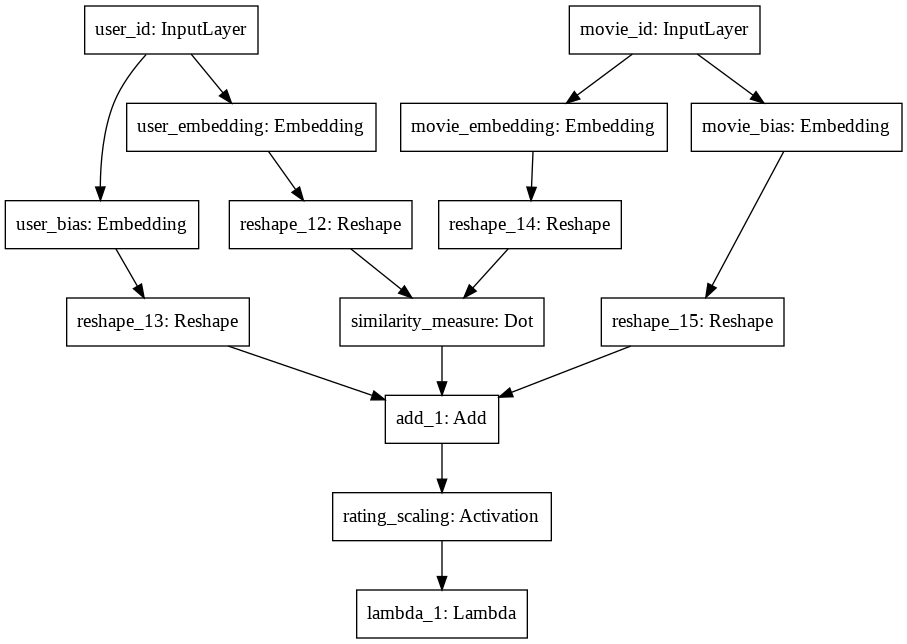

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1),name='user_id')
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6),name='user_embedding')(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6),name='user_bias')(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,),name='movie_id')
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6),name='movie_embedding')(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6),name='movie_bias')(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Dot(axes=1,name='similarity_measure')([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Activation('sigmoid',name='rating_scaling')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 3ms/step - loss: 1.2040 - root_mean_squared_error: 1.0970 - val_loss: 0.8552 - val_root_mean_squared_error: 0.9240
Epoch 2/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.7081 - root_mean_squared_error: 0.8402 - val_loss: 0.7499 - val_root_mean_squared_error: 0.8642
Epoch 3/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.5480 - root_mean_squared_error: 0.7378 - val_loss: 0.7285 - val_root_mean_squared_error: 0.8507
Epoch 4/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.4219 - root_mean_squared_error: 0.6456 - val_loss: 0.7321 - val_root_mean_squared_error: 0.8519
Epoch 5/5
1418/1418 [==============================] - 5s 3ms/step - loss: 0.3254 - root_mean_squared_error: 0.5648 - val_loss: 0.7450 - val_root_mean_squared_error: 0.8587


## Lesson 3: Going deeper
- Learner will be able to use Dense layers to build deeper models.


## Excercise

Build a deeper model by adding Dense layer before the output

## Answer

Model: "model_9"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_20 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_19 (Embedding)        (None, 1, 50)        30500       input_19[0][0]                   
__________________________________________________________________________________________________
embedding_21 (Embedding)        (None, 1, 50)        486200      input_20[0][0]                   
____________________________________________________________________________________________

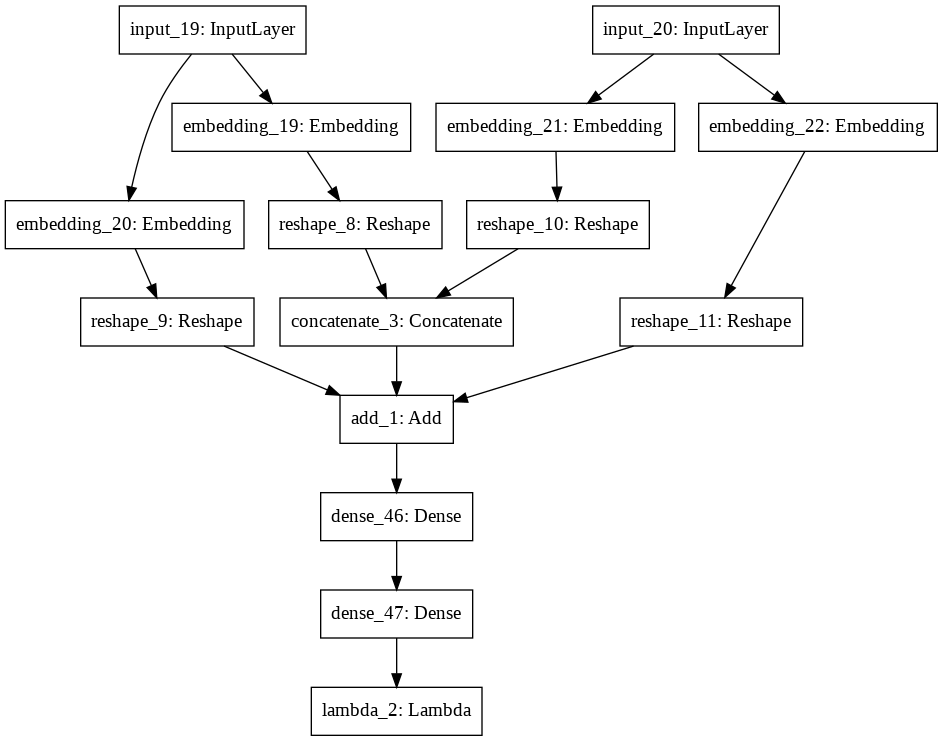

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz)(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1)(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz)(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1)(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.8406 - root_mean_squared_error: 0.9168 - val_loss: 0.7791 - val_root_mean_squared_error: 0.8827
Epoch 2/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6862 - root_mean_squared_error: 0.8284 - val_loss: 0.7653 - val_root_mean_squared_error: 0.8749
Epoch 3/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6388 - root_mean_squared_error: 0.7992 - val_loss: 0.7747 - val_root_mean_squared_error: 0.8803
Epoch 4/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6051 - root_mean_squared_error: 0.7779 - val_loss: 0.7803 - val_root_mean_squared_error: 0.8835
Epoch 5/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.5771 - root_mean_squared_error: 0.7597 - val_loss: 0.7858 - val_root_mean_squared_error: 0.8866


## Lesson 4: Use regularization to help model generalization


## Learning Objectives
- Learner will be able to incorporate Embedding regualization to help recommender system generalization.
- Learner will be able to incorporate Dropout to help recommender system generalization.

## Excercise

Add Embedding regularization

## Answer

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_23 (Embedding)        (None, 1, 50)        30500       input_21[0][0]                   
__________________________________________________________________________________________________
embedding_25 (Embedding)        (None, 1, 50)        486200      input_22[0][0]                   
___________________________________________________________________________________________

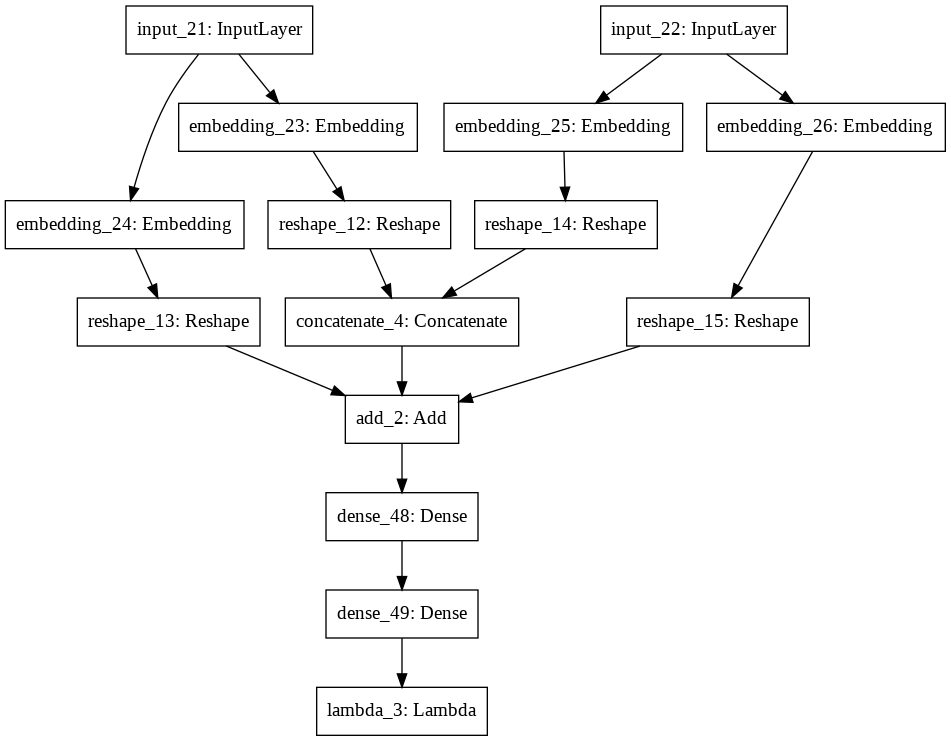

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 4ms/step - loss: 0.8321 - root_mean_squared_error: 0.9120 - val_loss: 0.7855 - val_root_mean_squared_error: 0.8860
Epoch 2/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.6844 - root_mean_squared_error: 0.8268 - val_loss: 0.7728 - val_root_mean_squared_error: 0.8785
Epoch 3/5
1418/1418 [==============================] - 6s 4ms/step - loss: 0.6352 - root_mean_squared_error: 0.7962 - val_loss: 0.7765 - val_root_mean_squared_error: 0.8805
Epoch 4/5
1418/1418 [==============================] - 7s 5ms/step - loss: 0.6029 - root_mean_squared_error: 0.7753 - val_loss: 0.7833 - val_root_mean_squared_error: 0.8840
Epoch 5/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.5768 - root_mean_squared_error: 0.7579 - val_loss: 0.7931 - val_root_mean_squared_error: 0.8893


## Excercise

Add Dropout layer to the model

Model: "model_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_23 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_24 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_27 (Embedding)        (None, 1, 50)        30500       input_23[0][0]                   
__________________________________________________________________________________________________
embedding_29 (Embedding)        (None, 1, 50)        486200      input_24[0][0]                   
___________________________________________________________________________________________

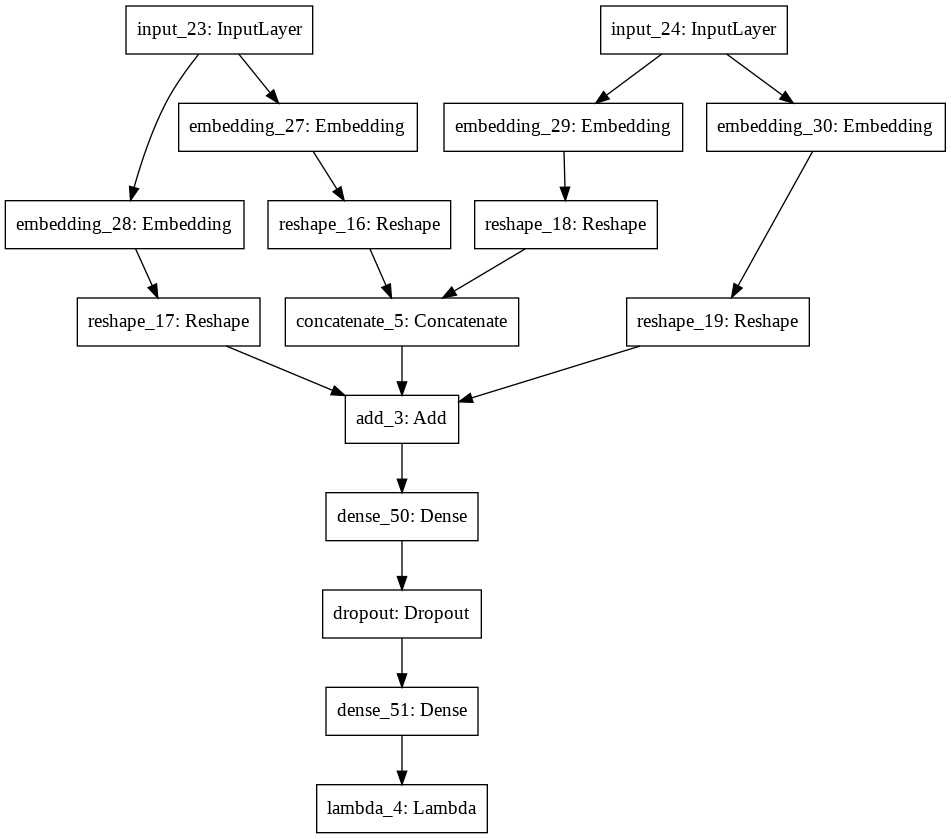

In [ ]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dropout(0.5)(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, to_file='model.png')

## Answer

In [ ]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


1418/1418 [==============================] - 5s 4ms/step - loss: 0.9589 - root_mean_squared_error: 0.9791 - val_loss: 0.7942 - val_root_mean_squared_error: 0.8908
Epoch 2/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.7692 - root_mean_squared_error: 0.8766 - val_loss: 0.7777 - val_root_mean_squared_error: 0.8813
Epoch 3/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.7311 - root_mean_squared_error: 0.8543 - val_loss: 0.7740 - val_root_mean_squared_error: 0.8791
Epoch 4/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.7090 - root_mean_squared_error: 0.8410 - val_loss: 0.7803 - val_root_mean_squared_error: 0.8824
Epoch 5/5
1418/1418 [==============================] - 5s 4ms/step - loss: 0.6982 - root_mean_squared_error: 0.8344 - val_loss: 0.7832 - val_root_mean_squared_error: 0.8838


# References
- https://developers.google.com/machine-learning/recommendation/overview
- https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
- https://www.youtube.com/watch?v=gbceqO8PpBg&t=6893s
- https://www.youtube.com/watch?v=qvRL74L81lg&t=1179s
- https://github.com/jalajthanaki/Movie_recommendation_engine
- https://www.datacamp.com/community/tutorials/recommender-systems-python?utm_source=adwords_ppc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=b&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-763347114660:dsa-473406569915&utm_loc_interest_ms=&utm_loc_physical_ms=9073656&gclid=Cj0KCQjws_r0BRCwARIsAMxfDRiqkUn4KsOkpT75T3HPhw8A68G6b36t0kpe0XFFLUt_QGcvVPV_u1saAkfMEALw_wcB